In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
import numpy as np
import mahotas as mh

In [17]:
image, prob, gold, rhoana, bb = gp.Legacy.read_dojo_data()

a


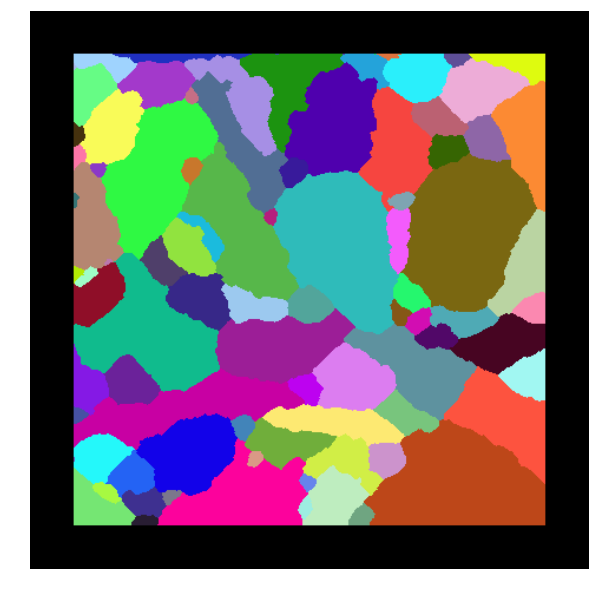

In [35]:
gp.Util.view(rhoana[9],large=True)

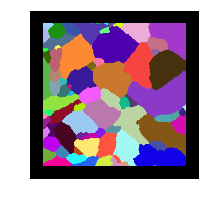

In [19]:
gp.Util.view(rhoana[1])

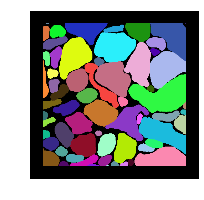

In [8]:
gp.Util.view(gold[2])

In [1]:
rhoana

NameError: name 'rhoana' is not defined

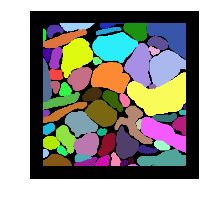

In [7]:
gp.Util.view(gold[0])

In [16]:
import h5py
import mahotas as mh
import numpy as np

In [13]:
#
# create gold h5 for neuroproof
#
all_labels = mh.fullhistogram(gold.astype(np.uint64))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint64)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]

with h5py.File('/home/d/fp_data/gold.h5', 'w') as hf:
    hf.create_dataset('stack', data=gold)
    hf.create_dataset('transforms', data=transforms)

In [16]:
#
# create rhoana h5 for neuroproof
#
# for z in range(10):
    
#     rhoana[z] += 100*z
    
# for z in range(10):
#     print rhoana[z].min(), rhoana[z].max()

    
import h5py
all_labels = mh.fullhistogram(rhoana[z].astype(np.uint64))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint64)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]

with h5py.File('/home/d/FP/dojoNEW/rhoana_'+str(z)+'.h5', 'w') as hf:
    hf.create_dataset('stack', data=rhoana)
    hf.create_dataset('transforms', data=transforms)

In [4]:

golds = np.zeros((30,500,500), dtype=np.uint64)
probs = np.zeros((30,500,500), dtype=np.uint8)
rhoanas = np.zeros((30,500,500), dtype=np.uint64)

# for z in range(0,50):
test_slices = range(15,25) + range(40,50) + range(65,75)
for i,z in enumerate(test_slices):
    image, prob, gold, rhoana = gp.Util.read_cremi_section(os.path.expanduser('/home/d/data/CREMIGP/TEST/'), z)
#     input_image.append(image[0:500,0:500])
#     input_prob.append(255.-prob[0:500,0:500])
#     input_gold.append(gold[0:500,0:500])
#     input_rhoana.append(rhoana[0:500,0:500])    
    golds[i] = gold[0:500,0:500]
    probs[i] = 255.-prob[0:500,0:500]
    rhoanas[i] = rhoana[0:500,0:500]

In [6]:
#
# now in 2d !!!!! FOR CREMI
#
import h5py
for z in range(30):
    
    print rhoanas[z:z+1].max()
    slice
    all_labels = mh.fullhistogram(rhoanas[z:z+1].astype(np.uint64))
    all_labels = np.where(all_labels!=0)

    transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint64)
    transforms[:,0] = all_labels[0]
    transforms[:,1] = all_labels[0]

    with h5py.File('/home/d/FP/CREMITEST/rhoana_'+str(z)+'.h5', 'w') as hf:
        hf.create_dataset('stack', data=rhoanas[z:z+1])
        hf.create_dataset('transforms', data=transforms)
        

150
135
175
177
194
172
174
186
175
139
87
87
101
117
103
85
76
91
79
72
196
179
174
134
140
172
132
124
112
96


In [7]:

for z in range(30):

    p1 = probs[z:z+1].copy()
    # has to be x,y,z and is z,y,x
    p1 = p1.swapaxes(0,2)
    p1 = p1.swapaxes(0,1)
    
    p2 = p1.copy()
    p2 = 255-p2

    
    p_2channels = np.zeros((p1.shape[0],p1.shape[1],p1.shape[2],2), dtype=np.float32)
    print p_2channels.shape
    p_2channels[:,:,:,0] = p1 / 255.
    p_2channels[:,:,:,1] = p2 / 255.
    with h5py.File('/home/d/FP/CREMITEST/prob_'+str(z)+'.h5', 'w') as hf:
        hf.create_dataset('volume/predictions', data=p_2channels)

(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)
(500, 500, 1, 2)


In [36]:
#
#
# now for cylinder!!! in 2D!!!
#

In [71]:
for z in range(250,300):
    
    image, prob, mask, gold, rhoana = gp.Util.read_section('/home/d/data/cylinderNEW',z)
    


    prob = 255-prob
    
    

    prob[mask==0] = 0    
    
    prob = prob.reshape((1, prob.shape[0], prob.shape[1]))
    
    p1 = prob.copy()
    # has to be x,y,z and is z,y,x
    p1 = p1.swapaxes(0,2)
    p1 = p1.swapaxes(0,1)
    
    p2 = p1.copy()
    p2 = 255-p2

    
    p_2channels = np.zeros((p1.shape[0],p1.shape[1],p1.shape[2],2), dtype=np.float32)
    print p_2channels.shape
    p_2channels[:,:,:,0] = p1 / 255.
    p_2channels[:,:,:,1] = p2 / 255.
    with h5py.File('/home/d/FP/cylinder/prob_'+str(z)+'.h5', 'w') as hf:
        hf.create_dataset('volume/predictions', data=p_2channels)
    
    
#     print rhoana[z:z+1].max()

#     slice

    all_labels = mh.fullhistogram(rhoana.astype(np.uint64))
    all_labels = np.where(all_labels!=0)

    transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint64)
    transforms[:,0] = all_labels[0]
    transforms[:,1] = all_labels[0]

    rhoana = rhoana.reshape((1, rhoana.shape[0], rhoana.shape[1]))    
    
    with h5py.File('/home/d/FP/cylinder/rhoana_'+str(z)+'.h5', 'w') as hf:
        hf.create_dataset('stack', data=rhoana)
        hf.create_dataset('transforms', data=transforms)
    
    
    
    
    
    print z

Loading z00000250.png
(2048, 2048, 1, 2)
250
Loading z00000251.png
(2048, 2048, 1, 2)
251
Loading z00000252.png
(2048, 2048, 1, 2)
252
Loading z00000253.png
(2048, 2048, 1, 2)
253
Loading z00000254.png
(2048, 2048, 1, 2)
254
Loading z00000255.png
(2048, 2048, 1, 2)
255
Loading z00000256.png
(2048, 2048, 1, 2)
256
Loading z00000257.png
(2048, 2048, 1, 2)
257
Loading z00000258.png
(2048, 2048, 1, 2)
258
Loading z00000259.png
(2048, 2048, 1, 2)
259
Loading z00000260.png
(2048, 2048, 1, 2)
260
Loading z00000261.png
(2048, 2048, 1, 2)
261
Loading z00000262.png
(2048, 2048, 1, 2)
262
Loading z00000263.png
(2048, 2048, 1, 2)
263
Loading z00000264.png
(2048, 2048, 1, 2)
264
Loading z00000265.png
(2048, 2048, 1, 2)
265
Loading z00000266.png
(2048, 2048, 1, 2)
266
Loading z00000267.png
(2048, 2048, 1, 2)
267
Loading z00000268.png
(2048, 2048, 1, 2)
268
Loading z00000269.png
(2048, 2048, 1, 2)
269
Loading z00000270.png
(2048, 2048, 1, 2)
270
Loading z00000271.png
(2048, 2048, 1, 2)
271
Loading z0

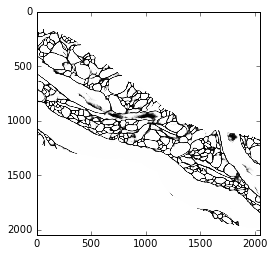

In [61]:
imshow(p2[:,:,0],cmap='gray')

In [72]:
rhoana[0].max()

0

In [28]:
p1 = prob[z:z+1].copy()

In [29]:
p1.shape

(1, 474, 474)

In [30]:
p1 = p1.swapaxes(0,2)

In [31]:
p1.shape

(474, 474, 1)

In [8]:
cmd = 'neuroproof_graph_predict rhoana_{z}.h5 prob_{z}.h5 classifier.h5 --output-file segmentation_{z}.h5 --graph-file graph_{z}.json --threshold 0'
for z in range(0,30):
    c = cmd.replace('{z}',str(z))
    print c

neuroproof_graph_predict rhoana_0.h5 prob_0.h5 classifier.h5 --output-file segmentation_0.h5 --graph-file graph_0.json --threshold 0
neuroproof_graph_predict rhoana_1.h5 prob_1.h5 classifier.h5 --output-file segmentation_1.h5 --graph-file graph_1.json --threshold 0
neuroproof_graph_predict rhoana_2.h5 prob_2.h5 classifier.h5 --output-file segmentation_2.h5 --graph-file graph_2.json --threshold 0
neuroproof_graph_predict rhoana_3.h5 prob_3.h5 classifier.h5 --output-file segmentation_3.h5 --graph-file graph_3.json --threshold 0
neuroproof_graph_predict rhoana_4.h5 prob_4.h5 classifier.h5 --output-file segmentation_4.h5 --graph-file graph_4.json --threshold 0
neuroproof_graph_predict rhoana_5.h5 prob_5.h5 classifier.h5 --output-file segmentation_5.h5 --graph-file graph_5.json --threshold 0
neuroproof_graph_predict rhoana_6.h5 prob_6.h5 classifier.h5 --output-file segmentation_6.h5 --graph-file graph_6.json --threshold 0
neuroproof_graph_predict rhoana_7.h5 prob_7.h5 classifier.h5 --output

In [15]:
#
# create prob h5 for neuroproof
#


p1 = prob.copy()
# has to be x,y,z
p1 = p1.swapaxes(0,2)
p1 = p1.swapaxes(0,1)

p2 = p1.copy()
p2 = 255-p2
p_2channels = np.zeros((prob.shape[2],prob.shape[1],prob.shape[0],2), dtype=np.float32)
p_2channels[:,:,:,0] = p1 / 255.
p_2channels[:,:,:,1] = p2 / 255.
with h5py.File('/home/d/fp_data/prob.h5', 'w') as hf:
    hf.create_dataset('volume/predictions', data=p_2channels)

In [6]:
image.shape

(10, 474, 474)

In [7]:
for z in range(10):
    
    mh.imsave('/home/d/dojo_xp/data/dojo_data_vis2014/images/'+str(z)+'.png', image[z])

In [28]:
image, prob, gold, rhoana, bb = gp.Legacy.read_dojo_test_data()

test data


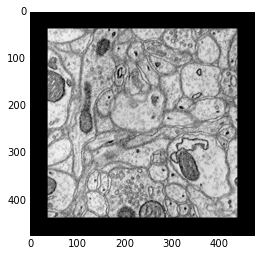

In [36]:
imshow(image[1], cmap='gray')

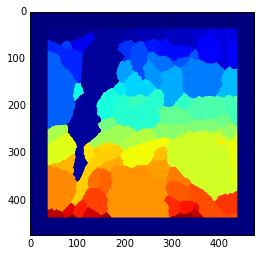

In [34]:
imshow(rhoana[2])

In [31]:
import h5py

In [32]:
#
# create gold h5 for neuroproof
#
all_labels = mh.fullhistogram(gold.astype(np.uint64))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint64)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]

with h5py.File('/home/d/FP/dojo_test/gold.h5', 'w') as hf:
    hf.create_dataset('stack', data=gold)
    hf.create_dataset('transforms', data=transforms)

In [33]:
#
# create rhoana h5 for neuroproof
#
all_labels = mh.fullhistogram(rhoana.astype(np.uint64))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint64)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]

with h5py.File('/home/d/FP/dojo_test/rhoana.h5', 'w') as hf:
    hf.create_dataset('stack', data=rhoana)
    hf.create_dataset('transforms', data=transforms)

In [44]:
fpseg = None
with h5py.File('/home/d/FP/dojo/segmentation.h5', 'r') as hf:
    list_of_names = []
    
    hf.visit(list_of_names.append)
    fpseg = hf['stack'].value

In [45]:
fpseg.shape

(10, 474, 474)

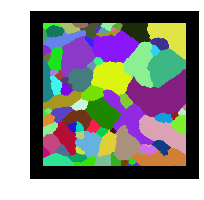

In [48]:
gp.Util.view(fpseg[0])

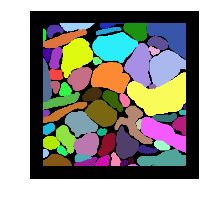

In [49]:
gp.Util.view(gold[0])

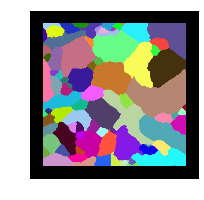

In [50]:
gp.Util.view(rhoana[0])

In [51]:
gp.Util.vi(rhoana[0], fpseg[0])

0.019174108323829486

In [52]:
gp.Util.vi(rhoana[0], gold[0])

0.4564952264711408

In [53]:
gp.Util.vi(gold[0], fpseg[0])

0.4741024281848949